In [14]:
import numpy as np
import pandas as pd
import os
rutaBase = os.getcwd().replace('\\', '/') + '/'
from calendar import month_abbr

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
custom_style = {'axes.facecolor': 'k',
                'axes.edgecolor': 'gray',
                'axes.labelcolor': 'white',
                'figure.facecolor': 'k',
                'grid.color': 'gray',
                'text.color': 'white',
                'xtick.color': 'white',
                'ytick.color': 'white',
                "xtick.major.size": 0,
                "ytick.major.size": 0}
sns.set_style(style='darkgrid', rc=custom_style)

In [4]:
os.chdir(rutaBase + '..')
from read_write import read_ascii, write_ascii

In [6]:
rutaTETIS = 'F:/Proyectos/GESDIVAH/SDM/TETIS/PdE/Actual/'

__Cobertura de vegetación__

In [ ]:
# leer ascii
read_ascii(rutaTETIS + 'cobveg.asc', datatype='int')
# extraer y recortar datos
cobveg = read_ascii.data.astype('float')
cobveg[cobveg.mask] = np.nan
cobveg = cobveg.data
maskrows = ~np.all(np.isnan(cobveg), axis=1)
maskcols = ~np.all(np.isnan(cobveg), axis=0)
cobveg = cobveg[maskrows,:][:,maskcols]
# extraer atributos
attrs = read_ascii.attributes

plt.imshow(cobveg, cmap='summer_r')
plt.axis('off');

__Factores de cultivo__

In [89]:
months = [month_abbr[m] for m in range(1, 13)]
cobVegs = ['BLF', 'CNF', 'SSH', 'PAST', 'DEN', 'UHD', 'WAE']

In [90]:
# importar datos de la simulación de TETIS
fETmes = pd.read_csv(rutaTETIS + 'FactorETmes_PdE.txt', sep='\t',
            skiprows=2, header=None)
fETmes.columns = months + ['intercep']
fETmes.index = cobVegs

In [91]:
# 'data frame' con la fracción de cuenca perteneciente a cada cobertura
counts = pd.Series(index=fETmes.index)
ncells = np.sum(~np.isnan(cobveg))
for v, veg in enumerate(counts.index):
    counts[veg] = np.sum(cobveg == v) / ncells

In [92]:
# calcular el factor de cultivo ponderado
for col in fETmes.columns:
    fETmes.loc['Wmean', col] = round((fETmes[col] * counts).sum(axis=0), 2)

fETmes

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,intercep
BLF,0.30,0.30,0.80,0.90,0.90,0.90,0.90,0.90,0.90,0.80,0.60,0.30,1.80
CNF,0.80,0.80,0.80,0.80,0.80,0.80,0.80,0.80,0.80,0.80,0.80,0.80,1.30
SSH,0.50,0.50,0.50,0.60,0.70,0.70,0.70,0.70,0.60,0.50,0.50,0.50,1.50
PAST,0.30,0.30,0.40,0.50,0.50,0.60,0.50,0.20,0.20,0.30,0.30,0.30,1.00
DEN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
UHD,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
WAE,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Wmean,0.45,0.45,0.49,0.52,0.52,0.56,0.52,0.42,0.42,0.45,0.45,0.45,0.91


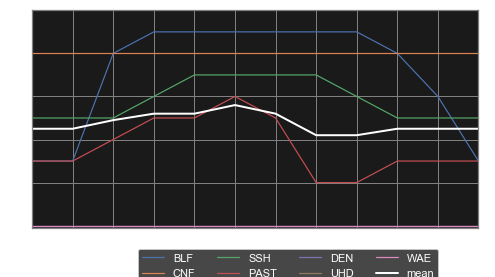

In [100]:
fig, ax = plt.subplots(figsize=(8, 4))
for veg in cobVegs:
    ax.plot(fETmes.loc[veg, months], lw=1.2, label=veg)
ax.plot(fETmes.loc['Wmean', months], c='w', lw=2, label='mean')
ax.set_xlim(0, 11)
ax.set_ylim(-.01, 1)
fig.legend(loc=8, ncol=4, bbox_to_anchor=(.25, -.04, 0.5, 0.1));

<font color='indianred'> 
    
*  No puede ser que la evapotranspiración de los cuerpos de agua sea nula. Al contrario, debería ser 0, puesto que es la 'pontencial'.
*  ¿Debe ser 0 la evapotranspiración del suelo desnudo? Probablemente no, puesto que evaporación sí se produce.
*  ¿Debe ser 0 la evapotranspiración del suelo urbano?